<h2> ======================================================</h2>
 <h1>MA477 - Theory and Applications of Data Science</h1> 
  <h1>Homework 4: A 2-Layer Neural Network</h1> 
 
 <h4>Dr. Valmir Bucaj</h4>
 <br>
 United States Military Academy, West Point, AY20-2
<h2>=======================================================</h2>

<h2> Weight: <font color='red'>120pts</font</h2>
    
<h2> Due Date: <font color='red'>4/29 by COB</font</h2>


<hr style="height:3.2px;border:none;color:#333;background-color:#333;" />

<h3> Cadet Name: Megan Raftery</h3> 
<br>
<h3>Date: 28 April 2020 </h3>

<br>

<font color='red' size='3'> <b>$\dots \dots$</b> MY DOCUMENTATION IDENTIFIES ALL SOURCES USED AND ASSISTANCE RECEIVED IN THIS ASSIGNMENT
<br>

<b>$\dots MR \dots$  </b> I DID NOT USE ANY SOURCES OR ASSISTANCE REQUIRING DOCUMENATION IN COMPLETING THIS ASSIGNMENT</font>

<h3> Signature/Initials: Megan Raftery </h3>

<hr style="height:3px;border:none;color:#333;background-color:#333;" />

<h2>Description</h2>

In this exercise you are asked to implement a 2-layer NN similar to the one presented in the picture below. 

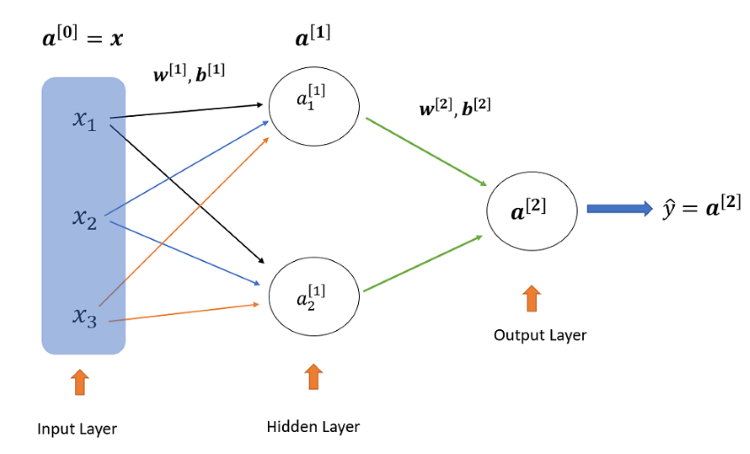

To facilitate the implementation process, I have provided you with the shell of each of the functions you need to create. Complete each of them in sequential order.




<h2>The Algorithm</h2>

The following algorithm is what we need to implement in Python:

For $iter$ in $range(1,N):$

\begin{eqnarray*}
\text{ Forward Propagation }\\
Z^{[1]}&=&W^{[1]}A^{[0]}+b^{[1]}\\
A^{[1]}&=&\tanh\left(Z^{[1]}\right)\\
& &\\
Z^{[2]}&=&W^{[2]}A^{[1]}+b^{[2]}\\
A^{[2]}&=&\sigma\left(Z^{[2]}\right)\\
J+&=&\frac{1}{N}L(A^{[2]},Y)\\
\end{eqnarray*}

\begin{eqnarray*}
\text{ Backpropagation}\\
dZ^{[2]}&=&A^{[2]}-Y \\
dW^{[2]}&=&\frac{1}{m}dZ^{[2]}A^{[1]\, T}\\
db^{[2]}&=&\frac{1}{m}np.sum(dZ^{[2]},axis=1,keepdims=True)\\
&&\\
dZ^{[1]}&=&W^{[2]\, T}dZ^{[2]}\times \frac{d}{dZ^{[1]}}\tanh\left(Z^{[1]}\right)\\
dW^{[1]}&=&\frac{1}{m}dZ^{[1]}A^{[0]\, T}\\
db^{[1]}&=&\frac{1}{m}np.sum(dZ^{[1]},axis=1,keepdims=True)\\
\end{eqnarray*}

\begin{eqnarray*}
\text{ Weight Update}\\
W^{[1]}&:=&W^{[1]}-\alpha dW^{[1]}\\
b^{[1]}&:=&b^{[1]}-\alpha db^{[1]}\\
&&\\
W^{[2]}&:=&W^{[2]}-\alpha dW^{[2]}\\
b^{[2]}&:=&b^{[2]}-\alpha db^{[2]}\\
\end{eqnarray*}


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<h3>Test Check</h3>

We will use the breast_cancer data set to make sure that you are getting the correct outputs

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer=load_breast_cancer()

In [4]:
X_cancer=cancer.data.T
Y_cancer=cancer.target.reshape(1,-1)

In [5]:
X_cancer.shape

(30, 569)

In [6]:
Y_cancer.shape

(1, 569)

<h2> Define the Sigmoid Function</h2>

<font color='red' size='3'>Weight: 5pts</font>

In [7]:
def sigmoid(z):
    
    return 1/(1+np.exp(-z))

In [8]:
sigmoid(1)

0.7310585786300049

<h4>Expected Output</h4> 

```python
sigmoid(1)=0.7310585786300049
```

<h2> Defining the Neural Network Structure</h2>


<font color='red' size='3'>Weight: 5pts</font>

$n_x$= number of input nodes

$n_h$=number of neurons in the hidden layer

$n_y$=number of output nodes

In [9]:
def nn_structure(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Output:
    n_x -- number of neurons/features in the input layer
    n_h -- number of neurons in the hidden layer
    n_y -- number of neurons in the output layer
    """
    
    #COMPLETE THE REST OF THE CODE BY REPLACING THE <<NONE>> WITH APPROPRIATE EXPRESSIONS
    
    n_x = X.shape[0]
    n_h = 2
    n_y = 1
   
    return (n_x, n_h, n_y)

In [10]:
nn_structure(X_cancer,Y_cancer)

(30, 2, 1)

<h4> Expected Output:</h4>

```python 

nn_structure(X_cancer,Y_cancer) = (30, 2, 1)

```

<h2> Weight & Bias Initialization</h2>


<font color='red' size='3'>Weight: 10pts</font>

In [11]:
def initialize_weights_biases(n_x, n_h, n_y):
    """
    Argument:
    n_x -- number of neurons/features in the input layer
    n_h -- number of neurons in the hidden layer
    n_y -- number of neurons in the output layer
    
    Returns:
    weights_bias -- dicionary storing the weights and biases for each of the layers:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
                    
    """
    #Don't change this
    np.random.seed(42)
    
    #COMPLETE THE REST OF THE CODE BY REPLACING THE <<NONE>> WITH APPROPRIATE EXPRESSIONS
    
    W1 = np.random.normal(scale=0.01,size=(n_h,n_x))
    b1 = np.zeros(shape=(n_h,1))
    W2 = np.random.normal(scale=0.01,size=(n_y,n_h))
    b2 = np.zeros(shape=(n_y,1))

    
    weights_biases = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    
    return weights_biases

In [12]:
n_x,n_h,n_y=nn_structure(X_cancer,Y_cancer)
weights_biases=initialize_weights_biases(n_x, n_h, n_y)

In [13]:
weights_biases

{'W1': array([[ 0.00496714, -0.00138264,  0.00647689,  0.0152303 , -0.00234153,
         -0.00234137,  0.01579213,  0.00767435, -0.00469474,  0.0054256 ,
         -0.00463418, -0.0046573 ,  0.00241962, -0.0191328 , -0.01724918,
         -0.00562288, -0.01012831,  0.00314247, -0.00908024, -0.01412304,
          0.01465649, -0.00225776,  0.00067528, -0.01424748, -0.00544383,
          0.00110923, -0.01150994,  0.00375698, -0.00600639, -0.00291694],
        [-0.00601707,  0.01852278, -0.00013497, -0.01057711,  0.00822545,
         -0.01220844,  0.00208864, -0.0195967 , -0.01328186,  0.00196861,
          0.00738467,  0.00171368, -0.00115648, -0.00301104, -0.01478522,
         -0.00719844, -0.00460639,  0.01057122,  0.00343618, -0.0176304 ,
          0.00324084, -0.00385082, -0.00676922,  0.00611676,  0.01031   ,
          0.0093128 , -0.00839218, -0.00309212,  0.00331263,  0.00975545]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[-0.00479174, -0.00185659]]),
 'b2': array([[0.]])}

<h4>Expected Output:</h4>

```python 

initialize_weights_biases(n_x, n_h, n_y)=

{'W1': array([[ 0.00496714, -0.00138264,  0.00647689,  0.0152303 , -0.00234153,
         -0.00234137,  0.01579213,  0.00767435, -0.00469474,  0.0054256 ,
         -0.00463418, -0.0046573 ,  0.00241962, -0.0191328 , -0.01724918,
         -0.00562288, -0.01012831,  0.00314247, -0.00908024, -0.01412304,
          0.01465649, -0.00225776,  0.00067528, -0.01424748, -0.00544383,
          0.00110923, -0.01150994,  0.00375698, -0.00600639, -0.00291694],
        [-0.00601707,  0.01852278, -0.00013497, -0.01057711,  0.00822545,
         -0.01220844,  0.00208864, -0.0195967 , -0.01328186,  0.00196861,
          0.00738467,  0.00171368, -0.00115648, -0.00301104, -0.01478522,
         -0.00719844, -0.00460639,  0.01057122,  0.00343618, -0.0176304 ,
          0.00324084, -0.00385082, -0.00676922,  0.00611676,  0.01031   ,
          0.0093128 , -0.00839218, -0.00309212,  0.00331263,  0.00975545]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[-0.00479174, -0.00185659]]),
 'b2': array([[0.]])}
```

<h2>Forward Propagation</h2>


<font color='red' size='3'>Weight: 20pts</font>

In [14]:

def forward_propagation(X, weights_biases):
    """
    Arguments:
    X -- input data of size (n_x, m)
    weights_biases -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The output of the NN
    outputs_of_layers -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    
    
    
     #COMPLETE THE REST OF THE CODE BY REPLACING THE <<NONE>> WITH APPROPRIATE EXPRESSIONS

    W1 = weights_biases['W1']
    b1 = weights_biases['b1']
    W2 = weights_biases['W2']
    b2 = weights_biases['b2']
    
     #COMPLETE THE REST OF THE CODE BY REPLACING THE <<NONE>> WITH APPROPRIATE EXPRESSIONS
        #Use 'tanh' as an activation function for the hiden layer and 'sigmoid' for the output layer
    
    Z1 = np.matmul(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.matmul(W2,A1)+b2
    A2 = sigmoid(Z2)
     
    outputs_of_layers = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    
    return A2, outputs_of_layers

In [15]:
A2,output_of_layers=forward_propagation(X_cancer, weights_biases)

In [16]:
A2.shape

(1, 569)

In [17]:
Y_cancer.shape

(1, 569)

In [18]:

print('Mean of Z1:',output_of_layers['Z1'].mean())

print('Mean of A1:',output_of_layers['A1'].mean())

print('Mean of Z2:',output_of_layers['Z2'].mean())

print('Mean of A2:',output_of_layers['A2'].mean())


Mean of Z1: -2.3154357133063597
Mean of A1: -0.7664624085543912
Mean of Z2: 0.004670466266075565
Mean of A2: 0.5011676135248366


<h4> Expected Output:</h4>

```python
Mean of Z1: -2.3154357133063597
Mean of A1: -0.7664624085543912
Mean of Z2: 0.004670466266075565
Mean of A2: 0.5011676135248366
```

<h2>Cost Function</h2>

<font color='red' size='3'>Weight: 15pts</font>

$$J(W,b) = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)}$$

The cost function $J$ can be computed without using a for-loop. Review the Perceptron implementation case for more details.

In [19]:
import math
def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost J(W,b)
    
    Arguments:
    A2 -- The final output of NN, of shape (1, # of examples) (y hat)
    Y -- The vector of 'true' values of shape (1, # of examples)

    
    Returns:
    cost -- cross-entropy cost
    
    """
    
    m = Y.shape[1] # number of example

    #COMPLETE THE REST OF THE CODE BY REPLACING THE <<NONE>> WITH APPROPRIATE EXPRESSIONS
    
    cost = -(1/m)*(np.matmul(Y,np.log(A2.T))+np.matmul(1-Y,np.log(1-A2.T)))
        
    cost = float(np.squeeze(cost))  # e.g. turns [[0.35]] into 0.35 
    
    return cost

In [20]:
compute_cost(A2,Y_cancer)

0.693121970701355

<h4>Expected Output:</h4>

```python 

compute_cost(A2,Y_cancer)=0.693121970701355

```


<h2>Back Propagation</h2>

<font color='red' size='3'>Weight: 20pts</font>

\begin{eqnarray*}
dZ^{[2]}&=&A^{[2]}-Y \\
dW^{[2]}&=&\frac{1}{m}dZ^{[2]}A^{[1]\, T}\\
db^{[2]}&=&\frac{1}{m}np.sum(dZ^{[2]},axis=1,keepdims=True)\\
&&\\
dZ^{[1]}&=&W^{[2]\, T}dZ^{[2]}\times \frac{d}{dZ^{[1]}}\tanh\left(Z^{[1]}\right)\\
dW^{[1]}&=&\frac{1}{m}dZ^{[1]}A^{[0]\, T}\\
db^{[1]}&=&\frac{1}{m}np.sum(dZ^{[1]},axis=1,keepdims=True)\\
\end{eqnarray*}

In [21]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(weights_biases, output_of_layers, X, Y):
    """    
    Arguments:
    weights_biases -- python dictionary containing our parameters 
    outputs_of_layers -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (n_x, # of examples)
    Y -- "true" labels vector of shape (1, # of examples)
    
    Returns:
    derivatives of J w.r.t different parameters (e.g. weights, biases, Zs)
    """
    m = X.shape[1]
    
    #COMPLETE THE REST OF THE CODE BY REPLACING THE <<NONE>> WITH APPROPRIATE EXPRESSIONS
    
    # Extract  W1 and W2 from the dictionary "weights_biases".

    W1 = weights_biases['W1']
    W2 = weights_biases['W2']

        
    # Extract also Z1,A1 and A2 from dictionary outputs_of_layers.
      
    Z1 = output_of_layers['Z1']
    A1 = output_of_layers['A1']
    A2 = output_of_layers['A2']
    

    
    # BACKPROPAGATION: calculate dW1, db1, dW2, and db2 

    dZ2 = output_of_layers['A2']-Y
    dW2 = (1/m)*np.matmul(dZ2,A1.T)
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims = True)
    dZ1 = np.matmul(W2.T,dZ2)*(1-(np.tanh(Z1)*np.tanh(Z1)))
    dW1 = (1/m)*np.matmul(dZ1,(X.T))
    db1 = (1/m)*np.sum(dZ1, axis=1,keepdims = True)

    
    derivatives= {"dW1":dW1,"db1": db1,"dW2": dW2,"db2": db2}
    
    return derivatives

In [22]:
derivatives=backward_propagation(weights_biases, output_of_layers, X_cancer, Y_cancer)

In [23]:
derivatives


{'dW1': array([[ 1.13623456e-02,  1.69857827e-02,  7.27993075e-02,
          4.11187904e-01,  8.98704596e-05,  7.33662531e-05,
          3.64891214e-05,  2.09026201e-05,  1.69382861e-04,
          6.17109184e-05,  2.47868187e-04,  1.18270197e-03,
          1.73538348e-03,  1.73453142e-02,  7.14983970e-06,
          1.97478126e-05,  2.30025852e-05,  9.00302969e-06,
          2.04765771e-05,  3.47654397e-06,  1.23854087e-02,
          2.21362547e-02,  8.01311657e-02,  4.86404440e-01,
          1.20996653e-04,  1.61324773e-04,  1.36280416e-04,
          6.34586826e-05,  2.60703582e-04,  7.68656280e-05],
        [ 1.46706418e-04,  5.18088911e-04,  8.15412908e-04,
         -7.02386554e-03,  2.69237092e-06, -6.88961931e-08,
         -2.77245632e-06, -1.79405010e-06,  5.49716404e-06,
          2.28778227e-06, -1.82620142e-06,  5.67583039e-05,
         -1.24013234e-05, -1.36476728e-03,  3.94252805e-07,
          5.16126499e-07,  7.45561914e-07,  1.58990098e-07,
          9.63846477e-07,  1.597

<h4>Expected Output:</h4>

```python

backward_propagation(weights_biases, output_of_layers, X_cancer, Y_cancer)=

{'dW1': array([[ 1.13623456e-02,  1.69857827e-02,  7.27993075e-02,
          4.11187904e-01,  8.98704596e-05,  7.33662531e-05,
          3.64891214e-05,  2.09026201e-05,  1.69382861e-04,
          6.17109184e-05,  2.47868187e-04,  1.18270197e-03,
          1.73538348e-03,  1.73453142e-02,  7.14983970e-06,
          1.97478126e-05,  2.30025852e-05,  9.00302969e-06,
          2.04765771e-05,  3.47654397e-06,  1.23854087e-02,
          2.21362547e-02,  8.01311657e-02,  4.86404440e-01,
          1.20996653e-04,  1.61324773e-04,  1.36280416e-04,
          6.34586826e-05,  2.60703582e-04,  7.68656280e-05],
        [ 1.46706418e-04,  5.18088911e-04,  8.15412908e-04,
         -7.02386554e-03,  2.69237092e-06, -6.88961931e-08,
         -2.77245632e-06, -1.79405010e-06,  5.49716404e-06,
          2.28778227e-06, -1.82620142e-06,  5.67583039e-05,
         -1.24013234e-05, -1.36476728e-03,  3.94252805e-07,
          5.16126499e-07,  7.45561914e-07,  1.58990098e-07,
          9.63846477e-07,  1.59740922e-07,  3.19787465e-05,
          5.66240074e-04,  3.69804890e-05, -2.55325477e-02,
          3.32272217e-06, -4.36057967e-06, -8.08334888e-06,
         -3.12704078e-06,  6.46637330e-06,  2.12935891e-06]]),
 'db1': array([[9.74124157e-04],
        [3.42725752e-05]]),
 'dW2': array([[-0.04429598,  0.12620191]]),
 'db2': array([[-0.12624891]])}
```

<h2>Weight Update</h2>

<font color='red' size='3'>Weight: 15pts</font>


\begin{eqnarray*}
W^{[1]}&:=&W^{[1]}-\alpha dW^{[1]}\\
b^{[1]}&:=&b^{[1]}-\alpha db^{[1]}\\
&&\\
W^{[2]}&:=&W^{[2]}-\alpha dW^{[2]}\\
b^{[2]}&:=&b^{[2]}-\alpha db^{[2]}\\
\end{eqnarray*}

In [24]:
# GRADED FUNCTION: update_parameters

def update_weights_biases(weights_biases, derivatives, learning_rate = 0.75):
    """
    Updates weights and biases using the gradient descent rules given above
    
    Arguments:
    weights_biases -- python dictionary containing weights and biases 
    derivatives -- python dictionary containing the derivatives of J w.r.t the different parameters 
    
    Returns:
    updated_weights_biases -- python dictionary containing your updated parameters 
    """
    
    #COMPLETE THE REST OF THE CODE BY REPLACING THE <<NONE>> WITH APPROPRIATE EXPRESSIONS
    
    
    # Retrieve each weight and bias from the dictionary 'weights_biases'

    W1 = weights_biases['W1']
    b1 = weights_biases['b1']
    W2 = weights_biases['W2']
    b2 = weights_biases['b2']

    
    # Retrieve each derivative from the dictionary 'derivatives'

    dW1 = derivatives['dW1']
    db1 = derivatives['db1']
    dW2 = derivatives['dW2']
    db2 = derivatives['db2']

    
    # UPDATE PARAMETERS

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    
    updated_weights_biases = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    
    return updated_weights_biases

In [25]:
update_weights_biases(weights_biases, derivatives, learning_rate = 0.75)

{'W1': array([[-0.00355462, -0.01412198, -0.0481226 , -0.29316063, -0.00240894,
         -0.00239639,  0.01576476,  0.00765867, -0.00482178,  0.00537932,
         -0.00482008, -0.00554432,  0.00111809, -0.03214179, -0.01725454,
         -0.00563769, -0.01014556,  0.00313572, -0.0090956 , -0.01412564,
          0.00536743, -0.01885995, -0.05942309, -0.37905081, -0.00553457,
          0.00098823, -0.01161215,  0.00370939, -0.00620191, -0.00297459],
        [-0.0061271 ,  0.01813422, -0.00074653, -0.00530921,  0.00822343,
         -0.01220838,  0.00209072, -0.01959536, -0.01328598,  0.0019669 ,
          0.00738604,  0.00167111, -0.00114718, -0.00198746, -0.01478552,
         -0.00719883, -0.00460695,  0.0105711 ,  0.00343546, -0.01763052,
          0.00321686, -0.0042755 , -0.00679696,  0.02526617,  0.0103075 ,
          0.00931607, -0.00838611, -0.00308978,  0.00330778,  0.00975385]]),
 'b1': array([[-7.30593118e-04],
        [-2.57044314e-05]]),
 'W2': array([[ 0.02843024, -0.09650802]

<h4>Expected Output:</h4>

```python

{'W1': array([[-0.00355462, -0.01412198, -0.0481226 , -0.29316063, -0.00240894,
         -0.00239639,  0.01576476,  0.00765867, -0.00482178,  0.00537932,
         -0.00482008, -0.00554432,  0.00111809, -0.03214179, -0.01725454,
         -0.00563769, -0.01014556,  0.00313572, -0.0090956 , -0.01412564,
          0.00536743, -0.01885995, -0.05942309, -0.37905081, -0.00553457,
          0.00098823, -0.01161215,  0.00370939, -0.00620191, -0.00297459],
        [-0.0061271 ,  0.01813422, -0.00074653, -0.00530921,  0.00822343,
         -0.01220838,  0.00209072, -0.01959536, -0.01328598,  0.0019669 ,
          0.00738604,  0.00167111, -0.00114718, -0.00198746, -0.01478552,
         -0.00719883, -0.00460695,  0.0105711 ,  0.00343546, -0.01763052,
          0.00321686, -0.0042755 , -0.00679696,  0.02526617,  0.0103075 ,
          0.00931607, -0.00838611, -0.00308978,  0.00330778,  0.00975385]]),
 'b1': array([[-7.30593118e-04],
        [-2.57044314e-05]]),
 'W2': array([[ 0.02843024, -0.09650802]]),
 'b2': array([[0.09468668]])}
```

<h2>Building the NN Model</h2>

<font color='red' size='3'>Weight: 20pts</font>

Here you are asked to put everything together and build the final NN model.

In [26]:
def nn_model(X, Y, n_h, num_iterations = 1000, learning_rate=0.75,print_cost=False):
    """
    Arguments:
    X -- dataset of shape (n_x, # of examples)
    Y -- labels of shape (1, # of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    weights_biases -- parameters learnt by the model (e.g. weights and biases) which will later
                    be used to make predictions.
    """
    
    np.random.seed(42)
    
    n_x = nn_structure(X, Y)[0]
    n_y = nn_structure(X, Y)[2]
    
    
     #COMPLETE THE REST OF THE CODE BY REPLACING THE <<NONE>> WITH APPROPRIATE EXPRESSIONS
        
    
    # Initialize weights and biases
 
    weights_biases = initialize_weights_biases(n_x, n_h, n_y)

    
    # Begin the for-loop for Gradient Descent

    for i in range(0, num_iterations):
         
        #FORWARD PROPAGATION
        
        A2, output_of_layers = forward_propagation(X, weights_biases)
        
        #COST FUNCTION
        
        cost = compute_cost(A2,Y_cancer)
        
 
        # BACKPROPAGATION
    
        derivatives = backward_propagation(weights_biases, output_of_layers, X_cancer, Y_cancer)
 
        # UPDATE WEIGHTS AND BIASES
    
        weights_biases = update_weights_biases(weights_biases, derivatives, learning_rate)
        

        
        # Print the cost every 100 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration {}: {:.9f}".format(i, cost))

    return weights_biases

In [27]:
weights_biases=nn_model(X_cancer, Y_cancer, 2, num_iterations = 10000, learning_rate=0.001,print_cost=True)

Cost after iteration 0: 0.693121971
Cost after iteration 1000: 0.584906685
Cost after iteration 2000: 0.478801157
Cost after iteration 3000: 0.421088384
Cost after iteration 4000: 0.387630416
Cost after iteration 5000: 0.360943494
Cost after iteration 6000: 0.343075472
Cost after iteration 7000: 0.327982400
Cost after iteration 8000: 0.362221968
Cost after iteration 9000: 0.307275237


In [28]:
weights_biases

{'W1': array([[ 0.00468012, -0.00192245,  0.00464936,  0.00706316, -0.00234462,
         -0.00234388,  0.01579097,  0.00767393, -0.00470053,  0.00542336,
         -0.00464192, -0.00470325,  0.00236443, -0.01957048, -0.01724951,
         -0.00562364, -0.01012917,  0.00314223, -0.00908108, -0.01412319,
          0.01434368, -0.00295505, -0.00133857, -0.02389584, -0.00544812,
          0.0011041 , -0.01151382,  0.00375573, -0.00601513, -0.00291973],
        [-0.07890398,  0.02485187, -0.32445425, -0.09785429,  0.00830306,
         -0.00890012,  0.00721979, -0.01736664, -0.01287911,  0.00182412,
          0.00664289,  0.0083052 ,  0.00569791,  0.09508684, -0.01475531,
         -0.00644592, -0.00384018,  0.01078521,  0.00371924, -0.01754841,
         -0.06912012,  0.06137449, -0.27141662,  0.14448716,  0.01079869,
          0.01947771,  0.00358178,  0.00071033,  0.00608735,  0.01047107]]),
 'b1': array([[-3.14778141e-05],
        [-9.98046598e-03]]),
 'W2': array([[-0.0922898 , -1.66268347]

<h4>Expected Output:</h4>

```python 
nn_model(X_cancer, Y_cancer, 2, num_iterations = 100, learning_rate=0.001,print_cost=True)

Cost after iteration 0: 0.693121971
Cost after iteration 1000: 0.584906685
Cost after iteration 2000: 0.478801157
Cost after iteration 3000: 0.421088384
Cost after iteration 4000: 0.387630416
Cost after iteration 5000: 0.360943494
Cost after iteration 6000: 0.343075472
Cost after iteration 7000: 0.327982400
Cost after iteration 8000: 0.362221968
Cost after iteration 9000: 0.307275237
    
weights_biases=

{'W1': array([[ 0.00468012, -0.00192245,  0.00464936,  0.00706316, -0.00234462,
         -0.00234388,  0.01579097,  0.00767393, -0.00470053,  0.00542336,
         -0.00464192, -0.00470325,  0.00236443, -0.01957048, -0.01724951,
         -0.00562364, -0.01012917,  0.00314223, -0.00908108, -0.01412319,
          0.01434368, -0.00295505, -0.00133857, -0.02389584, -0.00544812,
          0.0011041 , -0.01151382,  0.00375573, -0.00601513, -0.00291973],
        [-0.07890398,  0.02485187, -0.32445425, -0.09785429,  0.00830306,
         -0.00890012,  0.00721979, -0.01736664, -0.01287911,  0.00182412,
          0.00664289,  0.0083052 ,  0.00569791,  0.09508684, -0.01475531,
         -0.00644592, -0.00384018,  0.01078521,  0.00371924, -0.01754841,
         -0.06912012,  0.06137449, -0.27141662,  0.14448716,  0.01079869,
          0.01947771,  0.00358178,  0.00071033,  0.00608735,  0.01047107]]),
 'b1': array([[-3.14778141e-05],
        [-9.98046598e-03]]),
 'W2': array([[-0.0922898 , -1.66268347]]),
 'b2': array([[0.08857466]])}
```

<h2>Making Predictions</h2>

<font size='3' color='red' > Weight: 10pts</font>

In [29]:

def nn_predict(weights_biases, X):
    """
    Use the learnt parameters (the output of nn_model) to make predictions
    
    Arguments:
    weights_biases -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model
    """
    
    # Computes probabilities using forward propagation, then turn them into 0/1 outcomes using 0.5 as a threshold.

    A2, outputs_of_layers= forward_propagation(X, weights_biases)
    predictions_ = A2
    
    predictions = []
    
    for i in predictions_[0]:
        if i<=0.5:
            predictions.append(0)
        else:
            predictions.append(1)
    
    return predictions

In [30]:
rand_sample=np.random.randint(1,540,100)

In [31]:
X_test=X_cancer[:,rand_sample]
Y_test=Y_cancer[:,rand_sample]

In [32]:
predictions=nn_predict(weights_biases, X_test)



In [33]:
from sklearn.metrics import accuracy_score


In [34]:
accuracy_score(Y_test[0],predictions)

0.89

<h4>Expected Output: 0.89</h4>

This may change for you because `rand_sample` is a randomly chosen array


<font size='4' color='red'>Total Score:
    
  120/120
  
 </font>